In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
voice_data = pd.read_csv('data/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
voice_data.isnull().sum().sum()

0

In [6]:
voice_data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [7]:
X = voice_data.drop(['label'], axis=1)
y = voice_data['label']

In [8]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


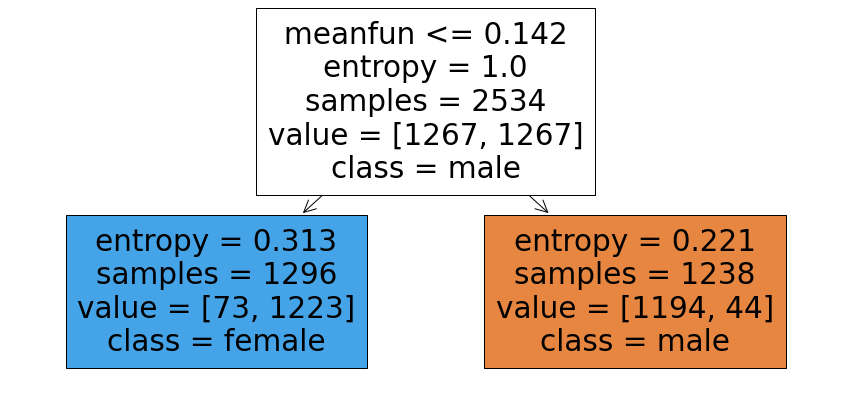

In [19]:
dt = tree.DecisionTreeClassifier(
    max_depth=1,
    criterion='entropy',
    random_state=42
)
dt.fit(X_train, y_train)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt,
    feature_names=X_train.columns,
    class_names=['male', 'female'],
    filled=True,
    impurity=True
);

In [20]:
len(X_train[X_train['meanfun'] <= 0.142]) / len(X_train)

0.511049723756906

In [21]:
y_test_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9558359621451105

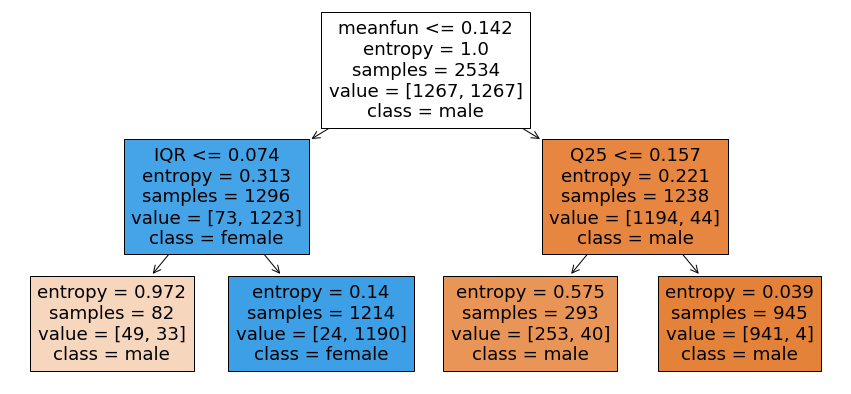

In [22]:
dt = tree.DecisionTreeClassifier(
    max_depth=2,
    criterion='entropy',
    random_state=42
)
dt.fit(X_train, y_train)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt,
    feature_names=X_train.columns,
    class_names=['male', 'female'],
    filled=True,
    impurity=True
);

In [23]:
y_test_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9621451104100947

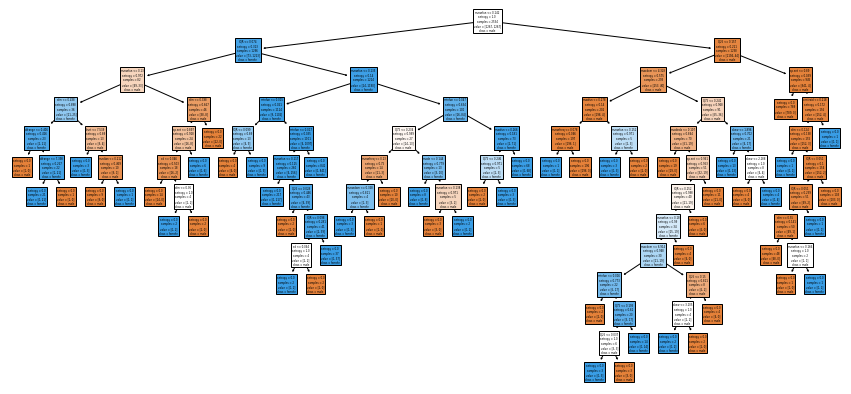

In [24]:
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=0
)
dt.fit(X_train, y_train)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt,
    feature_names=X_train.columns,
    class_names=['male', 'female'],
    filled=True,
    impurity=True
);

In [25]:
dt.get_depth()

12

In [26]:
dt.get_n_leaves()

54

In [27]:
y_train_pred = dt.predict(X_train)
display(metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = dt.predict(X_test)
display(metrics.accuracy_score(y_test, y_test_pred))

1.0

0.973186119873817

In [28]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [29]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

In [33]:
model = tree.DecisionTreeClassifier(
    random_state=0
)
hparam_searcher = model_selection.GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv)
hparam_searcher.fit(X_train, y_train)

display(hparam_searcher.best_params_)
display(hparam_searcher.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

0.9656687793811539

In [34]:
best_model = hparam_searcher.best_estimator_

y_train_pred = best_model.predict(X_train)
display(metrics.accuracy_score(y_train, y_train_pred))

y_test_pred = best_model.predict(X_test)
display(metrics.accuracy_score(y_test, y_test_pred))

0.9956590370955012

0.9700315457413249

In [35]:
hparam_searcher.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=0)

In [40]:
feature_importances = np.column_stack( (best_model.feature_names_in_, best_model.feature_importances_) )
feature_importances

array([['meanfreq', 0.0025707052518556175],
       ['sd', 0.004120208218002589],
       ['median', 0.0032473149554293214],
       ['Q25', 0.0014318403816894992],
       ['Q75', 0.0036135860165853353],
       ['IQR', 0.05681024375031138],
       ['skew', 0.004196205310064886],
       ['kurt', 0.006544483364439116],
       ['sp.ent', 0.0009191132138952542],
       ['sfm', 0.018004287903383286],
       ['mode', 0.006046796780732293],
       ['centroid', 0.0059850476870368105],
       ['meanfun', 0.8613473628009526],
       ['minfun', 0.014152589095229979],
       ['maxfun', 0.0],
       ['meandom', 0.0011996624508659548],
       ['mindom', 0.0015341193340475078],
       ['maxdom', 0.0],
       ['dfrange', 0.006888235494286113],
       ['modindx', 0.0013881979911922356]], dtype=object)

In [42]:
# feature_importances[feature_importances[:, 1].argsort()]
feature_importances[:, 1].argsort()

array([17, 14,  8, 15, 19,  3, 16,  0,  2,  4,  1,  6, 11, 10,  7, 18, 13,
        9,  5, 12])

In [45]:
feature_importances[feature_importances[:, 1].argsort()[::-1][:3]]

array([['meanfun', 0.8613473628009526],
       ['IQR', 0.05681024375031138],
       ['sfm', 0.018004287903383286]], dtype=object)

In [46]:
import scipy as sp

sp.stats.variation([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])

0.1321994335811558

In [47]:
np.var([4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2])

0.31673469387755115